In [1]:
import pandas as pd
import statsmodels.api as sma
import matplotlib.pyplot as plt

<p style="text-align:center">
    <font size="8" style="color:darkred">
        <div style="text-align:center">
        Filtros para Tendencia y Ciclo de Series Económicas
        </div>
    </font>

<p style="text-align:center">
    <font size="7" style="color:darkred">
        <div style="text-align:center">
        Desempleo e Inflación
        </div>
    </font>

<p style="text-align:center">
    <font size="6" style="color:darkred">
        <div style="text-align:center">
        Obtención de datos
        </div>
    </font>

In [2]:
data = pd.read_csv('../data/Inflación_Desempleo.csv', index_col='Periodos', parse_dates=['Periodos'], infer_datetime_format=True)
data

,Desempleo,Inflacion
Periodos,,
2005-01-01,3.951998,4.54
2005-02-01,3.773302,4.27
2005-03-01,3.627075,4.39
2005-04-01,3.363412,4.60
2005-05-01,3.303693,4.60
...,...,...
2021-11-01,3.664898,7.37
2021-12-01,3.514471,7.36
2022-01-01,3.706941,7.07


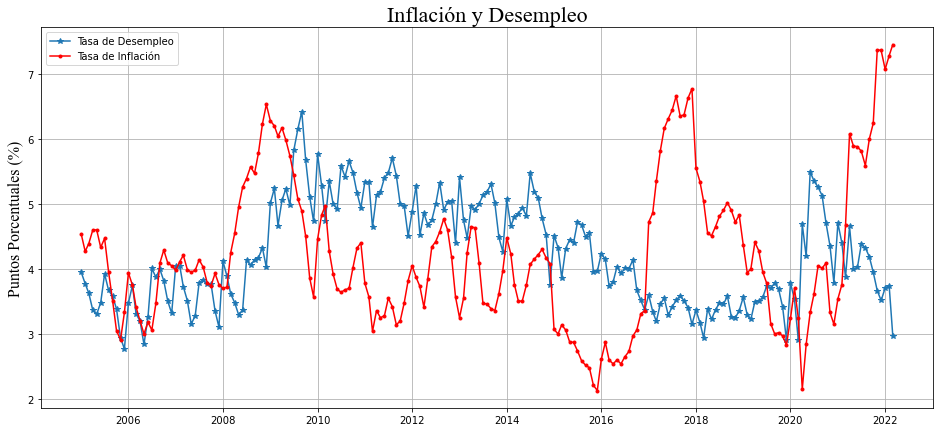

In [3]:
plt.figure(figsize=[16,7])

plt.plot(data['Desempleo'], label='Tasa de Desempleo', marker='*')
plt.plot(data['Inflacion'], label='Tasa de Inflación', color='red', marker='.')

plt.legend()
plt.grid(True)
plt.title('Inflación y Desempleo', font='Times New Roman', size=22)
plt.ylabel('Puntos Porcentuales (%)', font='Times New Roman', size=16)
plt.show()

Usando los datos de la inflación y el desempleo disponibles en INEGI, se realizan dos filtros para obtener una descomposición de las series. Acorde a la idea de que la inflación y el desempleo son contracíclicas, es decir, mientras una sube, la otra baja.
El filtro Baxter-King permite obtener el ciclo de la serie y se pierden 4 observaciones, por default, en ambos extremos de la serie.

In [4]:
ciclo_bk_desempleo = sma.tsa.filters.bkfilter(data['Desempleo']) # Filtro Baxter-King
ciclo_bk_inflacion = sma.tsa.filters.bkfilter(data['Inflacion'])

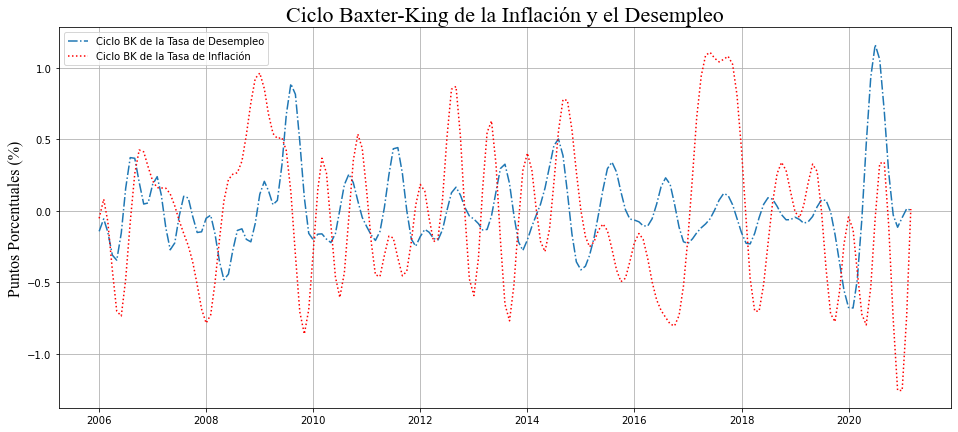

In [5]:
plt.figure(figsize=[16,7])

plt.plot(ciclo_bk_desempleo, label='Ciclo BK de la Tasa de Desempleo', linestyle='-.')
plt.plot(ciclo_bk_inflacion, label='Ciclo BK de la Tasa de Inflación', linestyle='dotted', color='red')

plt.legend()
plt.grid(True)
plt.title('Ciclo Baxter-King de la Inflación y el Desempleo', font='Times New Roman', size=22)
plt.ylabel('Puntos Porcentuales (%)', font='Times New Roman', size=16)
plt.show()

A diferencia del filtro Baxter-King, el filtro Christiano-Fitzgerald es una versión más extendida y completa del procedimiento anterior, como se puede observar en la gráfica, no se pierden observaciones y, además, se obtiene la tendencia de la serie económica utilizada.

In [6]:
ciclo_cf_desempleo, tendencia_cf_desempleo = sma.tsa.filters.cffilter(data['Desempleo']) # Filtro Christiano-Fitzgerald
ciclo_cf_inflacion, tendencia_cf_inflacion = sma.tsa.filters.cffilter(data['Inflacion'])

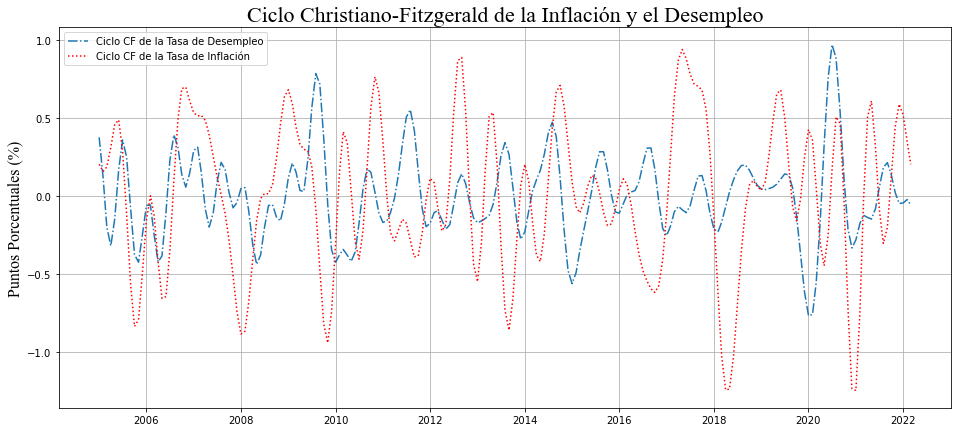

In [7]:
plt.figure(figsize=[16,7])

plt.plot(ciclo_cf_desempleo, label='Ciclo CF de la Tasa de Desempleo', linestyle='-.')
plt.plot(ciclo_cf_inflacion, label='Ciclo CF de la Tasa de Inflación', linestyle='dotted', color='red')

plt.legend()
plt.grid(True)
plt.title('Ciclo Christiano-Fitzgerald de la Inflación y el Desempleo', font='Times New Roman', size=22)
plt.ylabel('Puntos Porcentuales (%)', font='Times New Roman', size=16)
plt.show()

<p style="text-align:center">
    <font size="7" style="color:darkred">
        <div style="text-align:center">
        Producto Interno Bruto
        </div>
    </font>

Usando los datos del PIB previamente señalados y aplicados en la Notebook *Crecimiento Económico Real*, se procede a realizar una descomposición del PIB con el fin de obtener su tendencia y el ciclo con el filtro Hodrick-Prescott.

In [8]:
data = pd.read_csv('../data/PIB.csv', index_col='Periodos', parse_dates=['Periodos'], infer_datetime_format=True)

In [9]:
PIB = data.PIB.dropna()
ciclo_PIB, tendencia_PIB = sma.tsa.filters.hpfilter(PIB) # Filtro Hodrick-Precott

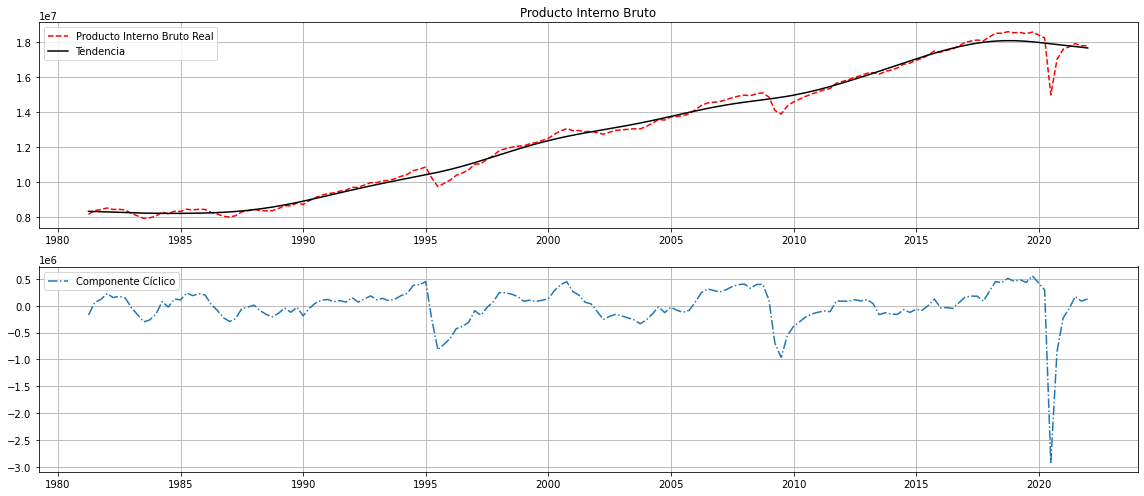

In [10]:
fig, axes = plt.subplots(2, figsize=(16, 7))

ax = axes[0]
ax.plot(PIB, label='Producto Interno Bruto Real', linestyle='dashed', color='red')
ax.plot(tendencia_PIB, label='Tendencia', color='black')
ax.set(title='Producto Interno Bruto')
ax.grid(True)
ax.legend()

ax = axes[1]
ax.plot(ciclo_PIB, label='Componente Cíclico', linestyle='-.')
ax.grid(True)
ax.legend()

fig.tight_layout() # Ajusta las figuras para que no se traslapen entre ellas

La gráfica anterior muestra una manera de realizar subplots para agrupar variables que se desean analizar en su conjunto.<br>
En cuanto a la utilización de cada filtro, depende del estudio y las ventajas que pueden proporcionar y eso depende del análisis. Se recomienda revisar la metodología publicada en el portal de <a href="https://www.statsmodels.org/stable/user-guide.html">statsmodels</a>.